### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('./data/spacex_api_labelled.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Visualizations

/home/lbandeira/.asdf/installs/python/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


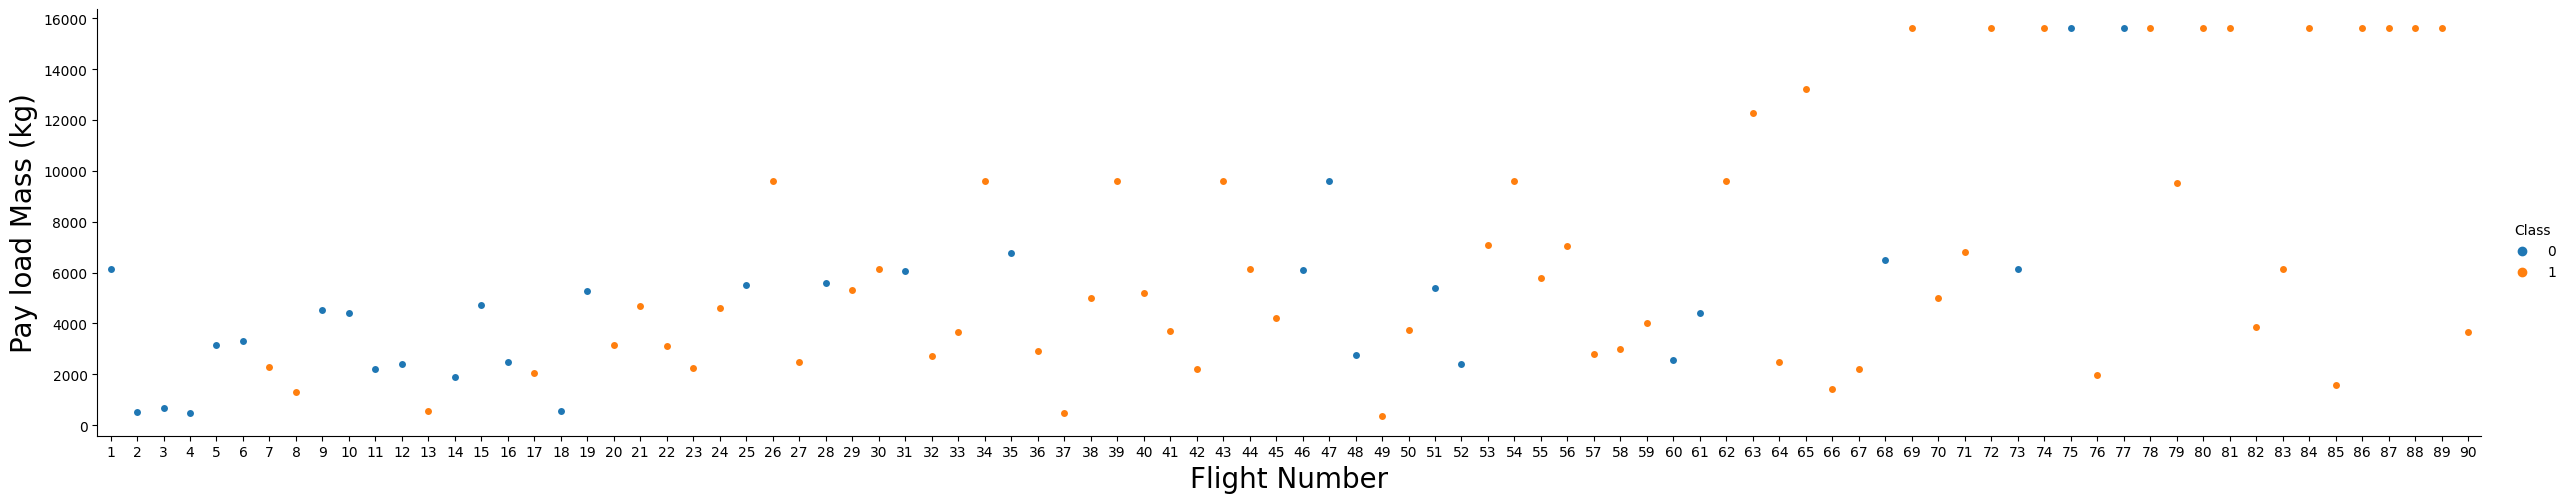

In [3]:
# Compare the Flight Number vs. Payload Mass, to see if there is a correlation between them and launch outcome
# We see that as the flight number increases, the first stage is more likely to land successfully
# Also, it seems that the more massive the payload, the more likely the first stage will land successfully
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

/home/lbandeira/.asdf/installs/python/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


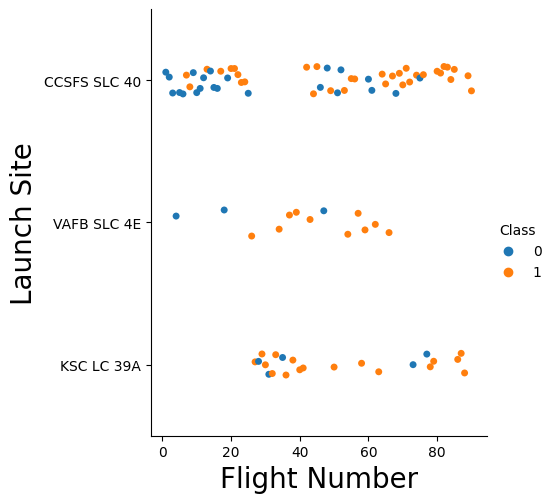

In [4]:
# Visualize the relationship between Flight Number and Launch Site
# We can clearly see that 'CCAFS SLS 40' has the biggest number of launches, but also the smallest succes rate.
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

/home/lbandeira/.asdf/installs/python/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


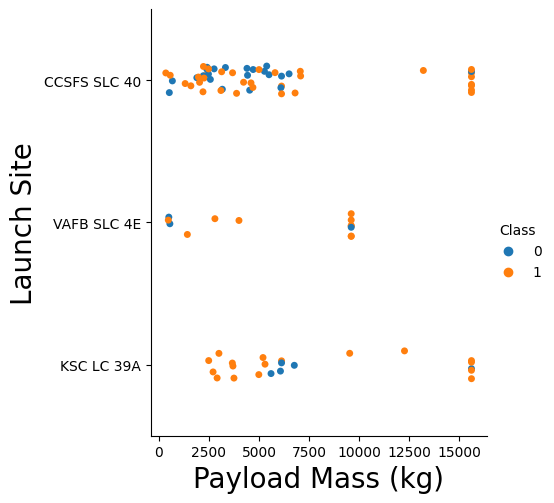

In [5]:
# Visualize the relationship between Payload and Launch Site
# We can see that there have been no launches from the 'VAFB SLC 4E' site involving payloads exceeding 10.000 kg
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

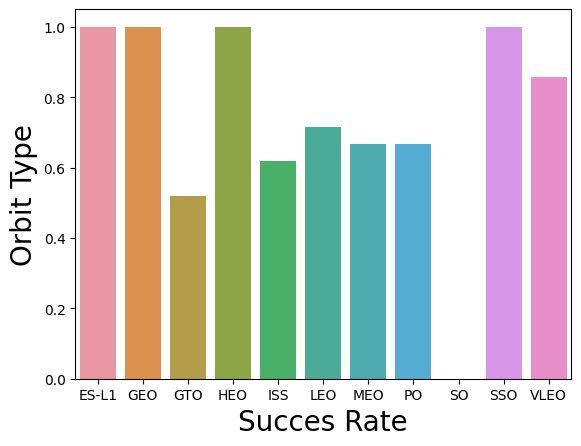

In [6]:
# Visualize the relationship between success rate of each orbit type
success_rate = df.groupby('Orbit')['Class'].mean()
success_df = success_rate.to_frame().reset_index()
sns.barplot(y="Class", x="Orbit", data=success_df)
plt.xlabel("Succes Rate",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

/home/lbandeira/.asdf/installs/python/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


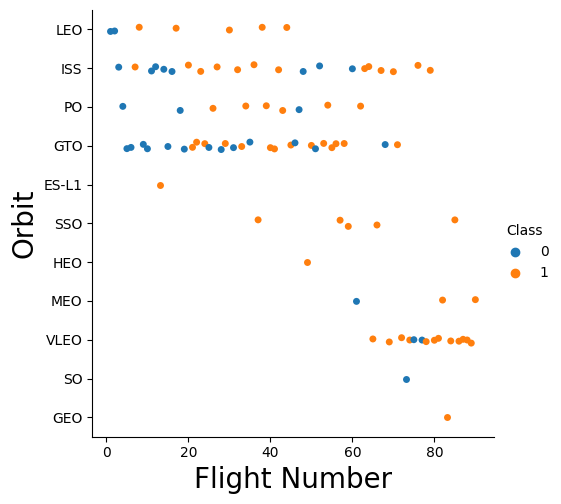

In [7]:
# Visualize the relationship between FlightNumber and Orbit type
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.ylabel('Orbit', fontsize=20)
plt.xlabel('Flight Number', fontsize=20)
plt.show()

/home/lbandeira/.asdf/installs/python/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


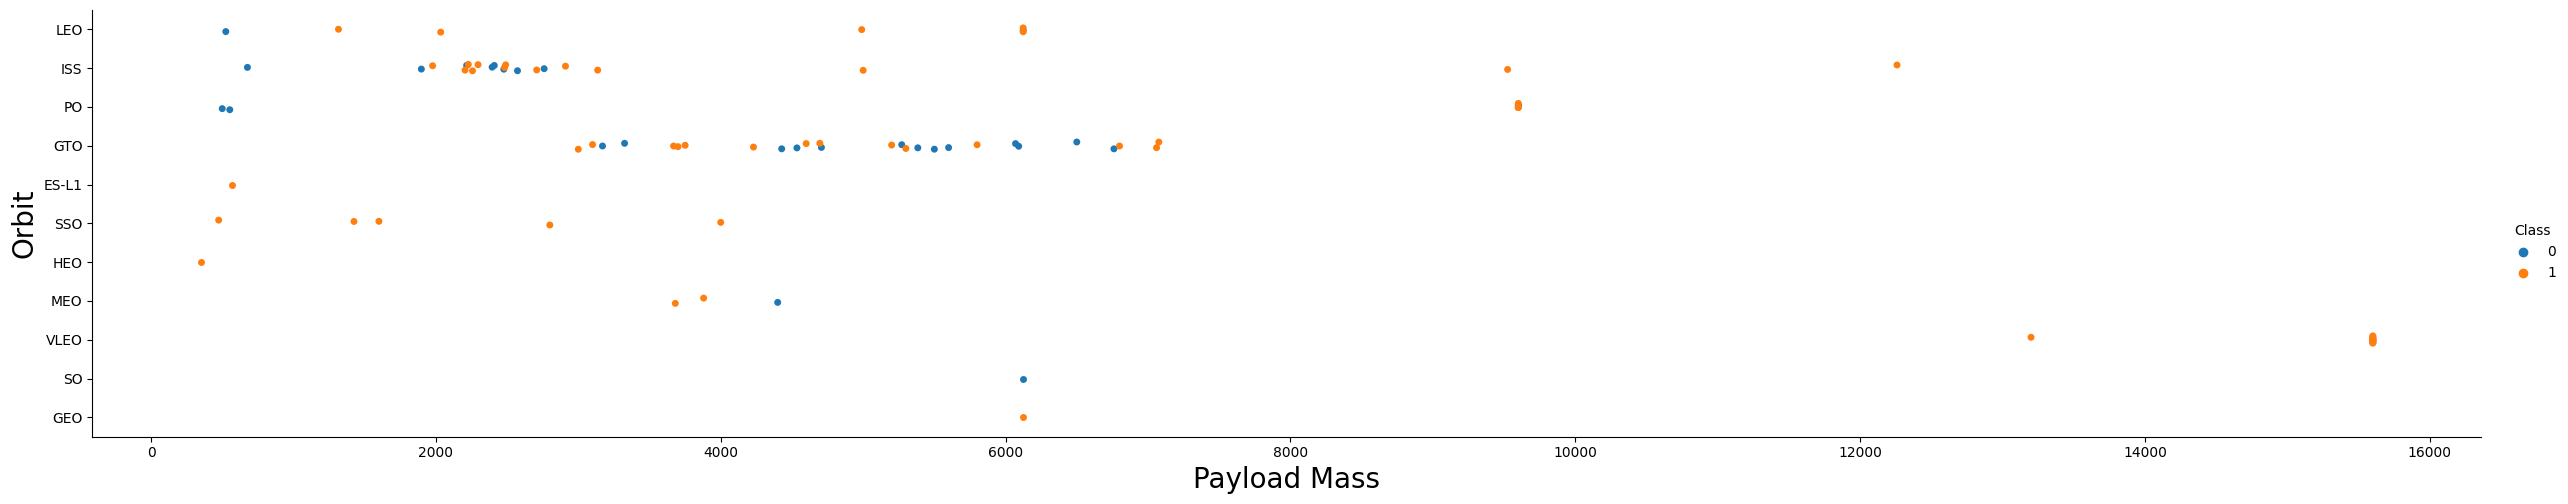

In [8]:
# Visualize the relationship between Payload and Orbit type
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.ylabel('Orbit', fontsize=20)
plt.xlabel('Payload Mass', fontsize=20)
plt.show()

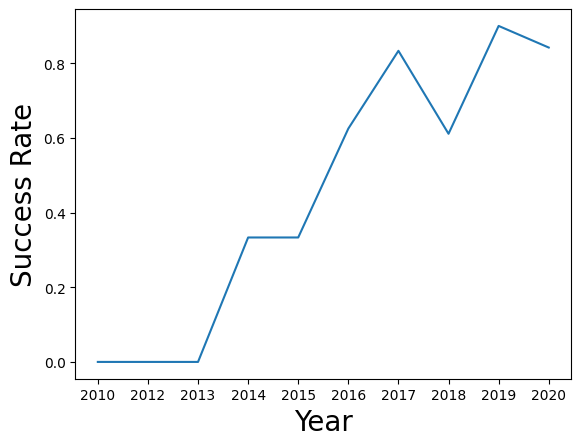

In [9]:
# Visualize the launch success yearly trend
year=[]

def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year()

df['Date'] = year
years_df = df.groupby('Date')['Class'].mean().reset_index()

sns.lineplot(x="Date", y="Class", data=years_df)
plt.ylabel('Success Rate', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

### Feature Engineering

In [10]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [11]:
# Apply OneHotEncoder to Orbits, LaunchSite, LandingPad, and Serial columns
dummies_columns = features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']]
features_one_hot = pd.get_dummies(dummies_columns)
features_one_hot

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
86,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
87,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [12]:
# Cast numeric columns to float64
features_one_hot = pd.concat([df[['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']], features_one_hot], axis=1)
features_one_hot = features_one_hot.astype('float64')

### Export Features Encoding

In [13]:
features_one_hot.to_csv('./data/spacex_api_encoding.csv', index=False)